In [ ]:
# Import necessary libraries
import pandas as pd
import re

# Load the dataset (ensure it's in the same directory as your notebook)
data = pd.read_csv('Machine Learning Sentiment.csv', encoding='ISO-8859-1')

# Step 1: Rename columns (adjust to match your dataset structure)
data.columns = ['id', 'timestamp', 'date_time', 'query', 'user_handle', 'text']

# Step 2: Clean the data by dropping the unnecessary columns
data = data.drop(columns=['id', 'timestamp', 'date_time', 'query', 'user_handle'], axis=1)

# Step 3: Rename 'text' column to 'cleaned_text'
data = data.rename(columns={'text': 'cleaned_text'})

# Step 4: Clean the tweet text (remove URLs, mentions, punctuation, etc.)
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove @mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()  # Lowercase and strip extra spaces
    return text

# Step 5: Apply text cleaning to the cleaned_text column
data['cleaned_text'] = data['cleaned_text'].apply(clean_text)

# Step 6: Display the cleaned data
print(data.head())


                                        cleaned_text
0  is upset that he cant update his facebook by t...
1  i dived many times for the ball managed to sav...
2     my whole body feels itchy and like its on fire
3  no its not behaving at all im mad why am i her...
4                                 not the whole crew


In [ ]:
# Check the columns in the dataset
print(data.columns)


Index(['cleaned_text'], dtype='object')


Missing values in the dataset:
cleaned_text    0
dtype: int64

Summary statistics for text length:
count    1.599999e+06
mean     6.252662e+01
std      3.429799e+01
min      0.000000e+00
25%      3.400000e+01
50%      5.800000e+01
75%      9.000000e+01
max      1.790000e+02
Name: text_length, dtype: float64


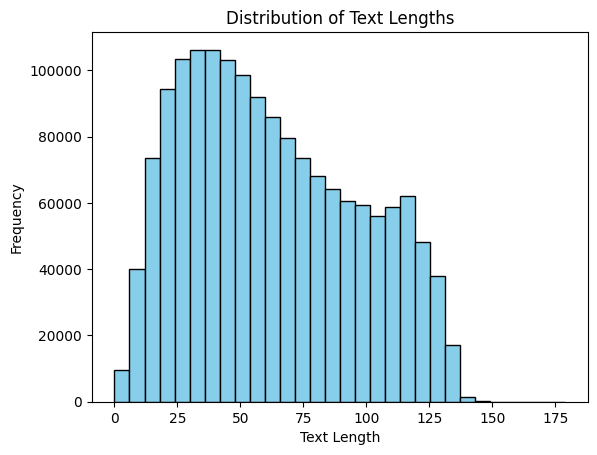


First few rows of the dataset:
                                        cleaned_text  text_length
0  is upset that he cant update his facebook by t...          105
1  i dived many times for the ball managed to sav...           75
2     my whole body feels itchy and like its on fire           46
3  no its not behaving at all im mad why am i her...           85
4                                 not the whole crew           18


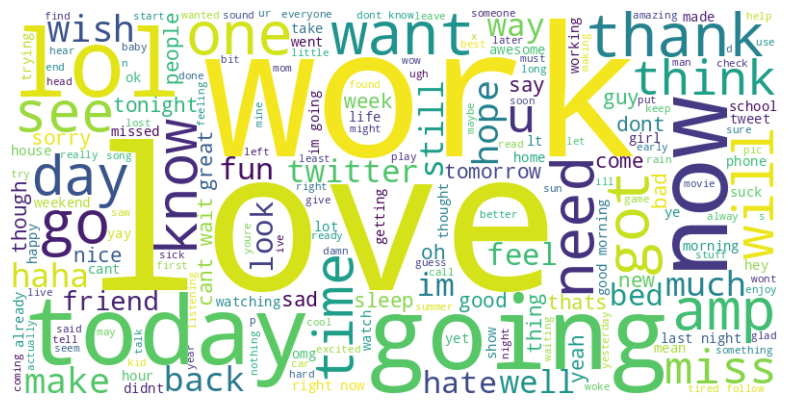

In [ ]:
import matplotlib.pyplot as plt

# Check for missing values in the dataset
print("Missing values in the dataset:")
print(data.isnull().sum())

# Display basic summary statistics for text length
data['text_length'] = data['cleaned_text'].apply(len)  # Calculate length of each text
print("\nSummary statistics for text length:")
print(data['text_length'].describe())

# Plot the distribution of text lengths
data['text_length'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

# Optional: Display a word cloud to visualize common words in the 'cleaned_text' column
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(data['cleaned_text']))

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
